# Summary
Let's look at the points that this post will cover: <br>

- What is the dataset? <br>
- Source of data? <br>
- What are the fields? <br>
- What is our objective? <br>
- Steps to our objective?
  - Questions?
  - Reading the data
  - Descriptive statistics
  - Inferential statistics
  - Exploratory data analysis
    - sql, plots
    - pandas, plots
    - highlight some important findings
  - Machine learning
  - Deep learning

## What is the dataset about?

The dataset has information about customer reviews on Amazon, specifically for food products. <br>

## Source of the dataset?

The dataset was first published at: http://snap.stanford.edu/data/web-FineFoods.html and has citation by J. McAuley and J. Leskovec named "From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews." and you can read it here: http://i.stanford.edu/~julian/pdfs/www13.pdf

## What are the fields?
- ProductId (ex. B001E4KFG0)
- UserId (ex. A3SGXH7AUHU8GW)
- ProfileName (ex. vikramiyer)
- HelpfulnessNumerator (ex. 10)
- HelpfulnessDenominator (ex. 20)
- Time (ex. 1303862400)
- Score (ex. 2)
- Summary (ex. Bad purchase!)
- Text (ex. I was expecting a good one this time as I had tried a different flavour from the same brand, however it sucks)

Let me discuss each one of them in detail: <br>
**ProductId**: This is a list of computer generated id which is unique per __product__ <br>
**UserId**: This is a list of computer generated id which is unique per __user__ <br>
**ProfileName**: Name of the user like usernames/profile names we have on github,twitter,facebook, etc <br>
**HelpfulnessNumerator**: The count of people who have found the review useful <br>
**HelpfulnessDenominator**: The total number of people who have either found the review __useful or not useful__. <br>
**Time**: Time when the review was given (this is unix time, we will have to convert into readable format) <br>
**Score**: Count in the range 1-5, which meantions the rating of a product where 1 is the lowest and 5 the highest <br>
**Summary**: Short summarization of the full length review <br>
**Text**: The complete review <br>

## What is our objective? <br>
By analyzing the above fields, we want to be able to come up with a model which says where a review is positive(good) or not(bad), just looking at the text or summary of the review.

In mathematical(conditional probability) terms, <br>
P(review=positive|summary,text) = ?, reads probability that a review is positive given summary and/or text

If this is not clear yet, don't worry, just keep reading the post and it will be clear somewhere midway!

## Steps to our objective?

### Questions?
- Which product has the max number of reviews?
- List down the top 10 products sorted by total number of review in the descending order.
- Which review was found to be most helpful?
- List down the top 10 reviews sorted by helfulness of the review in the descending order.
- Which day of the week has most number of sales?
- Which week of the month has more number of sales?
- Has any month seen high sales throughout all years?
- Has any year seen high sales?
- Does helpfulness depend on the length/size of the review?
- Do the summary and text have high corelation i.e. do summary and review both have same power in terms of calculating whether a review is positive or negative?
- Can we somehow know which type of food has high sales? (ex. pet food, cereals, cornflakes, dairy, etc)
- Are the profile names wierd? (ex. bot created)
- Distribution of Ratings

### Reading data

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Reviews.csv')

### Descriptive statistics

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns = ['Id', 'Pid', 'Uid', 'Name', 'HN', 'HD', 'Score', 'Time', 'Summary', 'Text']

In [5]:
df.head()

,Id,Pid,Uid,Name,HN,HD,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
#df['time'] = df.Time.apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
df['date'] = pd.to_datetime(df['Time'], unit='s')
df.drop(['Time','Id'], axis=1, inplace=True)
df.describe()

,HN,HD,Score
count,568454.000000,568454.00000,568454.000000
mean,1.743817,2.22881,4.183199
std,7.636513,8.28974,1.310436
min,0.000000,0.00000,1.000000
25%,0.000000,0.00000,4.000000
50%,0.000000,1.00000,5.000000
75%,2.000000,2.00000,5.000000
max,866.000000,923.00000,5.000000


In [7]:
df.head()

,Pid,Uid,Name,HN,HD,Score,Summary,Text,date
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


**Q. Which product has the max number of reviews? ** <br>
**Q. List down top 10 products ** <br>

Since we have the entire dataset in which there can be multiple entries of a product, we will first have to group the entire dataset by Pid (product id) and then count the number of reviews of the top product.

In [15]:
group_by_product_id = df.groupby('Pid')

In [71]:
products_counts = pd.DataFrame(group_by_product_id.agg('count').join(pd.DataFrame(group_by_product_id.size(), columns=['Count']))['Count'])

In [72]:
products_counts.sort_values('Count', ascending=False).head(10)

,Count
Pid,
B007JFMH8M,913
B0026RQTGE,632
B002QWHJOU,632
B002QWP89S,632
B002QWP8H0,632
B003B3OOPA,623
B001EO5Q64,567
B0026KPDG8,564
B000VK8AVK,564


This is some high number of reviews, let's check what this product is!

In [46]:
df[df['Pid'] == 'B007JFMH8M'].head(5)

,Pid,Uid,Name,HN,HD,Score,Summary,Text,date
562970,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,Delicious!,I love these cookies! Not only are they healt...,2012-07-28
562971,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...,2012-07-28
562972,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,Very good!,I am usually not a huge fan of oatmeal cookies...,2012-07-28
562973,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...,2012-07-28
562974,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...,2012-07-28


People seem to love cookies more than any other food :)

Aanother thing to note is that 4 products have same number of reviews, let's see if this is a coincidence or something has really gone wrong!

In [78]:
print df[df['Pid'] == 'B002QWP8H0']['Text'].head(1)
print df[df['Pid'] == 'B002QWP89S']['Text'].head(1)
print df[df['Pid'] == 'B002QWHJOU']['Text'].head(1)
print df[df['Pid'] == 'B0026RQTGE']['Text'].head(1)
#(df['Pid'] == 'B002QWP89S') | (df['Pid'] == 'B002QWHJOU') | (df['Pid'] == 'B0026RQTGE')]

355503    my 12 year old sheltie has chronic brochotitis...
Name: Text, dtype: object
20982    my 12 year old sheltie has chronic brochotitis...
Name: Text, dtype: object
329412    my 12 year old sheltie has chronic brochotitis...
Name: Text, dtype: object
74631    my 12 year old sheltie has chronic brochotitis...
Name: Text, dtype: object


Here is the catch, if you search these products on the amazon site, all are the same products with maybe different colors, flavours, etc

In [37]:
df[(df['Pid'] == 'B007JFMH8M') & (df['HN'] > 0)].head(2)

,Pid,Uid,Name,HN,HD,Score,Summary,Text,date
563070,B007JFMH8M,A1AJY4M502J8YY,mc25monini,5,5,5,Delicious,Ok so I love oatmeal cookies they are amazing....,2012-07-16
563071,B007JFMH8M,AZFX7FLEHCWXM,"Mary G. Longorio ""Texasbookgirl""",3,3,3,"Not bad, not great","I love oatmeal raisin cookies, really love the...",2012-07-28


In [67]:
df.sort_values('date', ascending=True).head(20)

,Pid,Uid,Name,HN,HD,Score,Summary,Text,date
150523,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,EVERY book is educational,this witty little book makes my son laugh at l...,1999-10-08
150500,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,1999-10-25
451855,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,1999-12-02
230284,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",1999-12-06
451877,B00004CXX9,A344SMIA5JECGM,Vincent P. Ross,1,2,5,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",1999-12-06
374358,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,5,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",1999-12-06
451854,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,5,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,2000-01-03
374421,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,5,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,2000-01-09
451948,B00004CXX9,A1048CYU0OV4O8,Judy L. Eans,2,2,5,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,2000-01-09
230347,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,5,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,2000-01-09


Looks like Books and Movies are also foods :) <br>
This means, this data has not only info on foods but also the other products than Amazon sold (books, movies being the evident ones!) <br>
We will have to clean such data so that are predictions are more accurate :)

Let's see how the number of reviews have increased with the passing years!

In [80]:
group_by_date = df.groupby('date')

In [81]:
date_counts = pd.DataFrame(group_by_date.agg('count').join(pd.DataFrame(group_by_date.size(), columns=['Count']))['Count'])

In [84]:
date_counts.sort_values('Count', ascending=False).head(10)

,Count
date,
2012-10-16,1143
2011-11-25,1088
2011-11-28,1070
2012-09-06,1018
2012-08-06,989
2011-12-07,978
2012-10-18,915
2012-04-19,906
2012-09-07,901


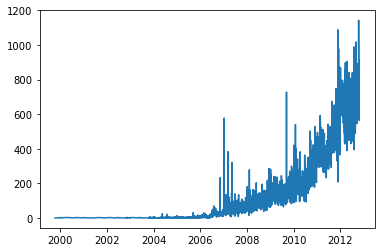

In [88]:
plt.plot(date_counts)

We can see that the number of reviews have increased over the time, with __2012__ showing substancial growth. <br>
The year __2007__ is the one where we can actually start seeing some spikes, seems like Amazon must have had some really cool strategy to acquire customers that year, and since then there has been no stopping it!

** Q. Which review was found to be most helpful? ** <br>
** Q. List down the top 10 reviews sorted by helfulness of the review in the descending order. ** <br>

Will postpone this for now!

Rating/Score distribution

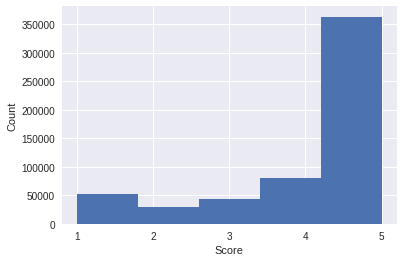

In [108]:
x = [1, 2, 3, 4, 5]
labels = ['1', '2', '3', '4', '5']
plt.hist(df['Score'], bins=5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(x, labels)
plt.show()